In [87]:
import keras
import itertools
import numpy as np

from numpy import array

from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.convolutional import *
from keras.layers.core import Dense, Flatten
from keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline

In [88]:
train_path = 'dogs-cats-images/train'
valid_path = 'dogs-cats-images/valid'
test_path = 'dogs-cats-images/test'

In [89]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=4)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog', 'cat'], batch_size=5)

Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


In [90]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [91]:
imgs, labels = next(train_batches)

C:\Users\statiq75\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


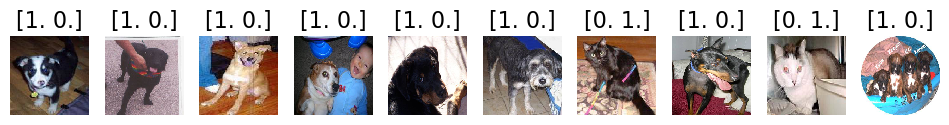

In [92]:
plots(imgs, titles=labels)

In [93]:
vgg16_model = keras.applications.vgg16.VGG16()

In [94]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [95]:
type(vgg16_model)

keras.engine.functional.Functional

In [96]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [97]:
for layer in model.layers:
    layer.trainable = False

In [98]:
model.add(Dense(2, activation ='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [99]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
model.fit(train_batches, steps_per_epoch=5, 
                    validation_data=valid_batches, validation_steps=7, epochs=5, verbose=2)

Epoch 1/5
5/5 - 7s - loss: 0.2029 - accuracy: 0.9000 - val_loss: 0.0587 - val_accuracy: 1.0000 - 7s/epoch - 1s/step
Epoch 2/5
5/5 - 7s - loss: 0.1552 - accuracy: 0.9400 - val_loss: 0.1668 - val_accuracy: 0.9286 - 7s/epoch - 1s/step
Epoch 3/5
5/5 - 7s - loss: 0.1030 - accuracy: 0.9800 - val_loss: 0.1798 - val_accuracy: 0.9286 - 7s/epoch - 1s/step
Epoch 4/5
5/5 - 7s - loss: 0.1080 - accuracy: 0.9400 - val_loss: 0.1513 - val_accuracy: 0.9286 - 7s/epoch - 1s/step
Epoch 5/5
5/5 - 7s - loss: 0.0924 - accuracy: 0.9400 - val_loss: 0.0455 - val_accuracy: 1.0000 - 7s/epoch - 1s/step


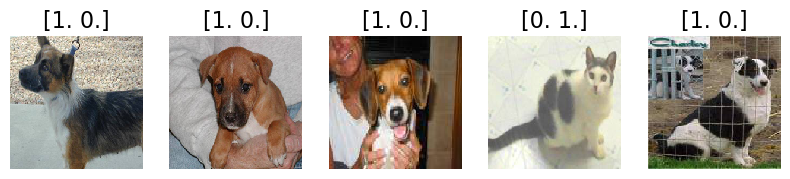

In [103]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [104]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 0., 1.], dtype=float32)

In [117]:
predictions = model.predict(test_batches, steps=1, verbose=0)
predictions

array([[6.8909172e-03, 9.9310911e-01],
       [9.2141235e-01, 7.8587659e-02],
       [1.1292226e-01, 8.8707775e-01],
       [9.9892080e-01, 1.0792619e-03],
       [9.9944144e-01, 5.5849669e-04]], dtype=float32)

In [118]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

In [119]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [120]:
i = 0
while i < 5:
    first = predictions[i:i+1, :-1]
    i+=1
    if first > 0.50:
        print("It's a dog")
    else:
        print("It's a cat")

It's a cat
It's a dog
It's a cat
It's a dog
It's a dog
It's a cat
It's a cat
It's a cat
It's a cat
It's a cat


C:\Users\statiq75\AppData\Local\Temp\ipykernel_812\616495914.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if first > 0.50:


Confusion matrix, without normalization
[[0 1]
 [2 2]]


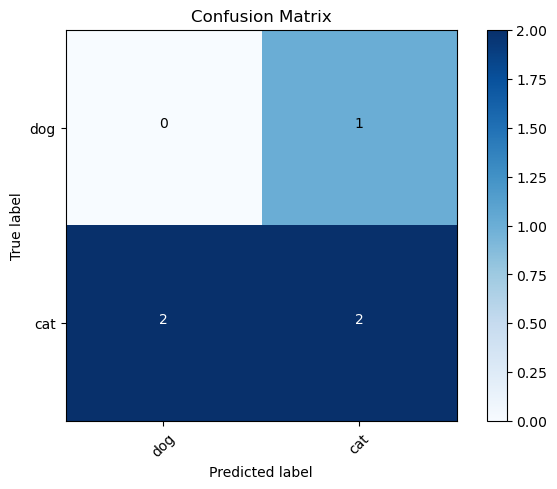

In [121]:
cm_plot_labels = ['dog','cat']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')